# Formula 1 World Championship (1950 - 2020) dataset


The dataset consists of all information on the Formula 1 races, drivers, constructors, qualifying, circuits, lap times, pit stops, championships from 1950 till the latest ended 2020 season.

Link do dataset https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
circuits = pd.read_csv('archive/circuits.csv')
races = pd.read_csv('archive/races.csv')
results = pd.read_csv('archive/results.csv')
lap_times = pd.read_csv('archive/lap_times.csv')
drivers = pd.read_csv('archive/drivers.csv')
drivers_standings = pd.read_csv('archive/driver_standings.csv')
constructors = pd.read_csv('archive/constructors.csv')
constructors_standings = pd.read_csv('archive/constructor_standings.csv')
qualifying = pd.read_csv('archive/qualifying.csv')
pit_stops = pd.read_csv('archive/pit_stops.csv')

# Best teams all time

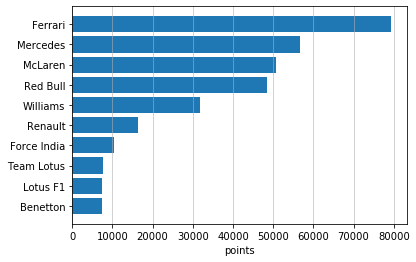

In [3]:
top_constructors = constructors_standings.groupby('constructorId')['points'].sum().sort_values(ascending=False)[:10]
top_constructrs_names = [constructors[constructors['constructorId'] == i]['name'].values[0] for i in top_constructors.index]

plt.barh(range(0, 10) ,top_constructors.values[::-1])
plt.yticks(range(0, 10), top_constructrs_names[::-1])
plt.grid(axis='x', alpha=0.7)
plt.xlabel('points')
plt.show()

### #wins for top3 teams

In [4]:
top3_idx = list(top_constructors[:3].index)
top3_wins = [results[(results['position'] == '1') & (results['constructorId'] == i)]['position'].count() for i in top3_idx]
f'Ferrari won {top3_wins[0]} races, Mercedes {top3_wins[1]}, and McLaren {top3_wins[2]}'

'Ferrari won 239 races, Mercedes 112, and McLaren 178'

### 3 drivers with most wins in each of top3 teams

In [5]:
mst_wns_top3_teams = [results[(results['position'] == '1') & (results['constructorId'] == i)].groupby('driverId')['position'].count().sort_values()[-3:]
                      for i in top3_idx]
mst_wns_drivers = [drivers[drivers['driverId'] == i]['surname'].values[0] for j in range(0, 3) for i in mst_wns_top3_teams[j].index]

for i, k in zip(top3_idx, range(3)):
    print(constructors[constructors['constructorId'] == i]['name'].values[0])
    for j in range(2,-1,-1):
        print(f'{mst_wns_drivers[3*k + j]} won {mst_wns_top3_teams[k].values[j]} races')        
    print('\n')

Ferrari
Schumacher won 72 races
Lauda won 15 races
Vettel won 14 races


Mercedes
Hamilton won 71 races
Rosberg won 23 races
Bottas won 9 races


McLaren
Senna won 35 races
Prost won 30 races
Hamilton won 21 races




# Top 15 drivers

### By points

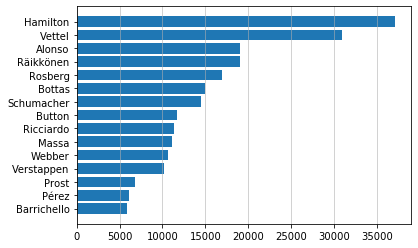

In [9]:
top_15_drivers = drivers_standings.groupby('driverId')['points'].sum().sort_values(ascending=False)[:15]
top_15_driver_names = [drivers[drivers['driverId'] == i]['surname'].values[0] for i in top_15_drivers.index]

plt.barh(range(0, 15) ,top_15_drivers.values[::-1])
plt.yticks(range(0, 15), top_15_driver_names[::-1])
plt.grid(axis='x', alpha=0.7)
plt.show()

### By #wins

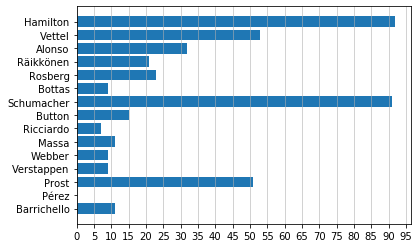

In [10]:
top_15_drivers_wins = [results[(results['positionOrder'] == 1) & (results['driverId'] == i)].count()['position']
                       for i in top_15_drivers.index]

plt.barh(range(0, 15) ,top_15_drivers_wins[::-1])
plt.yticks(range(0, 15), top_15_driver_names[::-1])
plt.xticks(range(0, 100, 5))
plt.grid(axis='x', alpha=0.7)
plt.show()

### Drivers with most podium finish year by year

In [11]:
years = np.sort(races['year'].unique())
races_in_year = [list(races[races['year'] == i]['raceId'].values) for i in years]
podium_drivers_by_race = [results[(results['raceId'] == i) & (results['positionOrder'] <= 3)]['driverId'].values
                         for j in range(len(years)) for i in races_in_year[j]]
year_length = [len(i) for i in races_in_year]

In [12]:
def make_podiums_list():
    suma = 0
    podiums = []
    for i in year_length:
        drivers_idx = []
        for j in range(i):
            tmp_lst = [podium_drivers_by_race[suma + j][k] for k in range(len(podium_drivers_by_race[suma + j]))]
            for elem in tmp_lst:
                drivers_idx.append(elem)
        
        mst_frq_driver = max(set(drivers_idx), key=drivers_idx.count)
        podiums.append((mst_frq_driver, drivers_idx.count(mst_frq_driver)))
        suma += i
        
    return podiums

In [13]:
podiums = make_podiums_list()

In [14]:
num_podiums = [podiums[i][1] for i in range(len(podiums))]
driver_names = [drivers[drivers['driverId'] == podiums[i][0]]['surname'].values[0] for i in range(len(podiums))]
num_races_in_year = [len(races_in_year[i]) for i in range(len(races_in_year))]

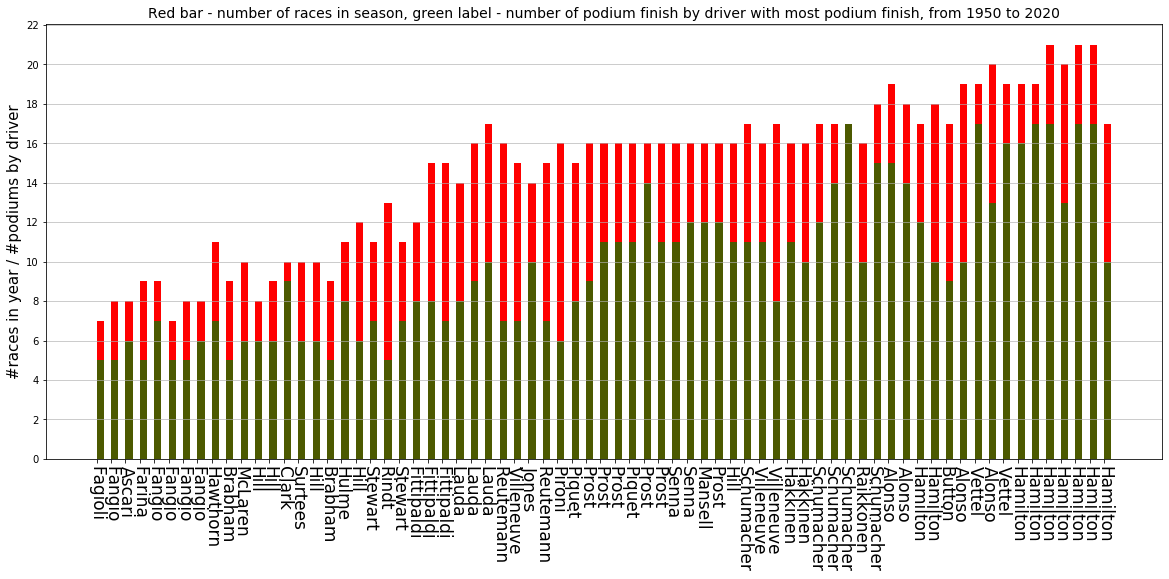

In [15]:
plt.figure(figsize=(20, 8))
plt.bar(range(1, 72), num_races_in_year, align='edge', width=0.5, color='red')
plt.bar(range(1, 72), num_podiums, align='edge', width=0.5, alpha=0.7, color='green')
plt.yticks(range(0, 23, 2))
plt.xticks(range(1, 72), driver_names, rotation=-90, fontsize=17)
plt.grid(axis='y', alpha=0.8)
plt.ylabel('#races in year / #podiums by driver', fontsize=15)
plt.title('Red bar - number of races in season, green label - number of podium finish by driver with most podium finish, from 1950 to 2020', fontsize=14)
plt.show()

# Last year standings

In [16]:
races_in_2019 = list(races[races['year'] == 2019]['raceId'].values)
drivers_2019 = list(results[results['raceId'] == races_in_2019[0]]['driverId'].unique())

score_list = [[i, []] for i in drivers_2019]
score_dict = dict(score_list)

for race in races_in_2019:
    drivers_res = results[results['raceId'] == race]['driverId'].values
    for driver in drivers_res:
        race_points = [results[(results['raceId'] == race) & (results['driverId'] == driver)]['points'].values[0]]
        if score_dict[driver]:
            prev_res = score_dict[driver][-1]
        else:
            prev_res = 0
        tot_points = race_points[0] + prev_res
        score_dict[driver] += [tot_points]

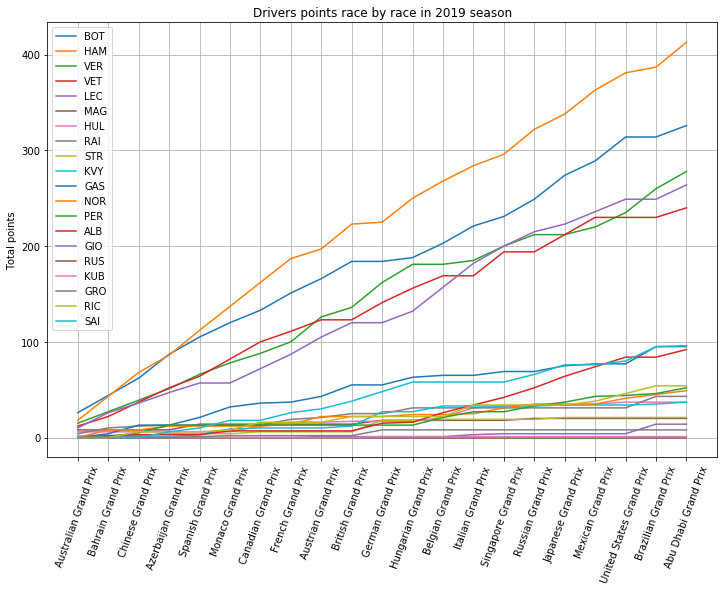

In [17]:
plt.figure(figsize=(12,8))

for driver in score_dict.keys():
    plt.plot(range(len(races_in_2019)), score_dict[driver], label=drivers[drivers['driverId'] == driver]['code'].values[0])

# plt.plot(range(len(races_in_2019)), [i * 25 for i in range(1, len(races_in_2019) + 1)], label='26pts every race')
plt.title('Drivers points race by race in 2019 season')
plt.ylabel('Total points')
plt.xticks(range(0, 21), [races[races['raceId'] == race]['name'].values[0] for race in races_in_2019], rotation=70)
plt.grid()
plt.legend()
plt.show()

### Comparison between quali and race laptime

In [18]:
crcIds = [14, 13, 6, 24]   # mozna, spa, monaco, yas_marina
rcIds = [races[(races['circuitId'] == i) & (races['year'] >= 2009)]['raceId'].values for i in crcIds]

monza_times_quali = [qualifying[(qualifying['raceId'] == i) & (qualifying['position'] == 1)]['q3'].values[0]
               for i in rcIds[0]]
monza_times_race = [results[(results['raceId'] == i) & (results['position'] == '1')]['fastestLapTime'].values[0]
               for i in rcIds[0]]

spa_times_quali = [qualifying[(qualifying['raceId'] == i) & (qualifying['position'] == 1)]['q3'].values[0]
               for i in rcIds[1]]
spa_times_race = [results[(results['raceId'] == i) & (results['position'] == '1')]['fastestLapTime'].values[0]
               for i in rcIds[1]]

monaco_times_quali = [qualifying[(qualifying['raceId'] == i) & (qualifying['position'] == 1)]['q3'].values[0]
               for i in rcIds[2]]
monaco_times_race = [results[(results['raceId'] == i) & (results['position'] == '1')]['fastestLapTime'].values[0]
               for i in rcIds[2]]

marina_times_quali = [qualifying[(qualifying['raceId'] == i) & (qualifying['position'] == 1)]['q3'].values[0]
               for i in rcIds[3][:-1]]
marina_times_race = [results[(results['raceId'] == i) & (results['position'] == '1')]['fastestLapTime'].values[0]
               for i in rcIds[3][:-1]]

In [19]:
# string values to float values (laptime now in seconds)
monza_times_quali = [int(time[:1]) * 60 + int(time[2:4]) + int(time[5:])/ 1000 for time in monza_times_quali]
monza_times_race = [int(time[:1]) * 60 + int(time[2:4]) + int(time[5:])/ 1000 for time in monza_times_race]

spa_times_quali = [int(time[:1]) * 60 + int(time[2:4]) + int(time[5:])/ 1000 for time in spa_times_quali]
spa_times_race = [int(time[:1]) * 60 + int(time[2:4]) + int(time[5:])/ 1000 for time in spa_times_race]

monaco_times_quali = [int(time[:1]) * 60 + int(time[2:4]) + int(time[5:])/ 1000 for time in monaco_times_quali]
monaco_times_race = [int(time[:1]) * 60 + int(time[2:4]) + int(time[5:])/ 1000 for time in monaco_times_race]

marina_times_quali = [int(time[:1]) * 60 + int(time[2:4]) + int(time[5:])/ 1000 for time in marina_times_quali]
marina_times_race = [int(time[:1]) * 60 + int(time[2:4]) + int(time[5:])/ 1000 for time in marina_times_race]

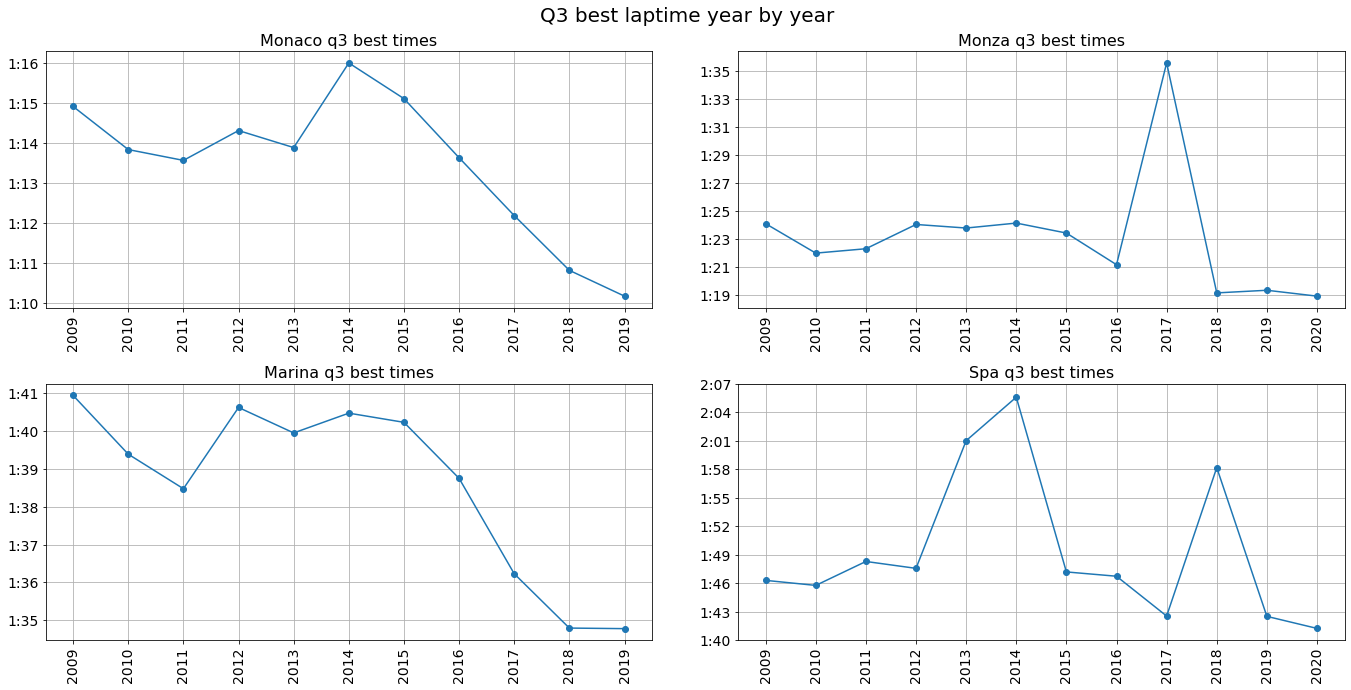

In [20]:
fig,ax =  plt.subplots(2,2, figsize=(20,10))
fig.tight_layout(pad=5.5)

ax[0][0].plot(range(len(monaco_times_quali)), monaco_times_quali, marker='o')
ax[0][0].set_yticks(range(70, 77), minor=False)
ax[0][0].set_yticklabels(['1:10', '1:11', '1:12', '1:13', '1:14', '1:15', '1:16'], fontsize=14)
ax[0][0].set_xticks(range(len(monaco_times_quali)), minor=False)
ax[0][0].set_xticklabels([str(elem) for elem in list(range(2009, 2020))], rotation='vertical', fontsize=14)
ax[0][0].set_title('Monaco q3 best times', fontsize=16)
ax[0][0].grid()


ax[0][1].plot(range(len(monza_times_quali)), monza_times_quali, marker='o')
ax[0][1].set_yticks(range(79, 97, 2), minor=False)
ax[0][1].set_yticklabels(['1:19', '1:21', '1:23', '1:25', '1:27', '1:29', '1:31', '1:33', '1:35'], fontsize=14)
ax[0][1].set_xticks(range(len(monza_times_quali)), minor=False)
ax[0][1].set_xticklabels([str(elem) for elem in list(range(2009, 2021))], rotation='vertical', fontsize=14)
ax[0][1].set_title('Monza q3 best times', fontsize=16)
ax[0][1].grid()


ax[1][0].plot(range(len(marina_times_quali)), marina_times_quali, marker='o')
ax[1][0].set_yticks(range(95, 102), minor=False)
ax[1][0].set_yticklabels(['1:35', '1:36', '1:37', '1:38', '1:39', '1:40', '1:41'], fontsize=14)
ax[1][0].set_xticks(range(len(marina_times_quali)), minor=False)
ax[1][0].set_xticklabels([str(elem) for elem in list(range(2009, 2020))], rotation='vertical', fontsize=14)
ax[1][0].set_title('Marina q3 best times', fontsize=16)
ax[1][0].grid()


ax[1][1].plot(range(len(spa_times_quali)), spa_times_quali, marker='o')
ax[1][1].set_yticks(range(100, 128, 3), minor=False)
ax[1][1].set_yticklabels(['1:40', '1:43', '1:46', '1:49', '1:52', '1:55', '1:58', '2:01', '2:04', '2:07'], fontsize=14)
ax[1][1].set_xticks(range(len(spa_times_quali)), minor=False)
ax[1][1].set_xticklabels([str(elem) for elem in list(range(2009, 2021))], rotation='vertical', fontsize=14)
ax[1][1].set_title('Spa q3 best times', fontsize=16)
ax[1][1].grid()

fig.suptitle('Q3 best laptime year by year', fontsize=20)
plt.show()

In [21]:
monaco_diff = [i - j for i, j in zip(monaco_times_race, monaco_times_quali)]
monza_diff = [i - j for i, j in zip(monza_times_race, monza_times_quali)]
spa_diff = [i - j for i, j in zip(spa_times_race, spa_times_quali)]
marina_diff = [i - j for i, j in zip(marina_times_race, marina_times_quali)]

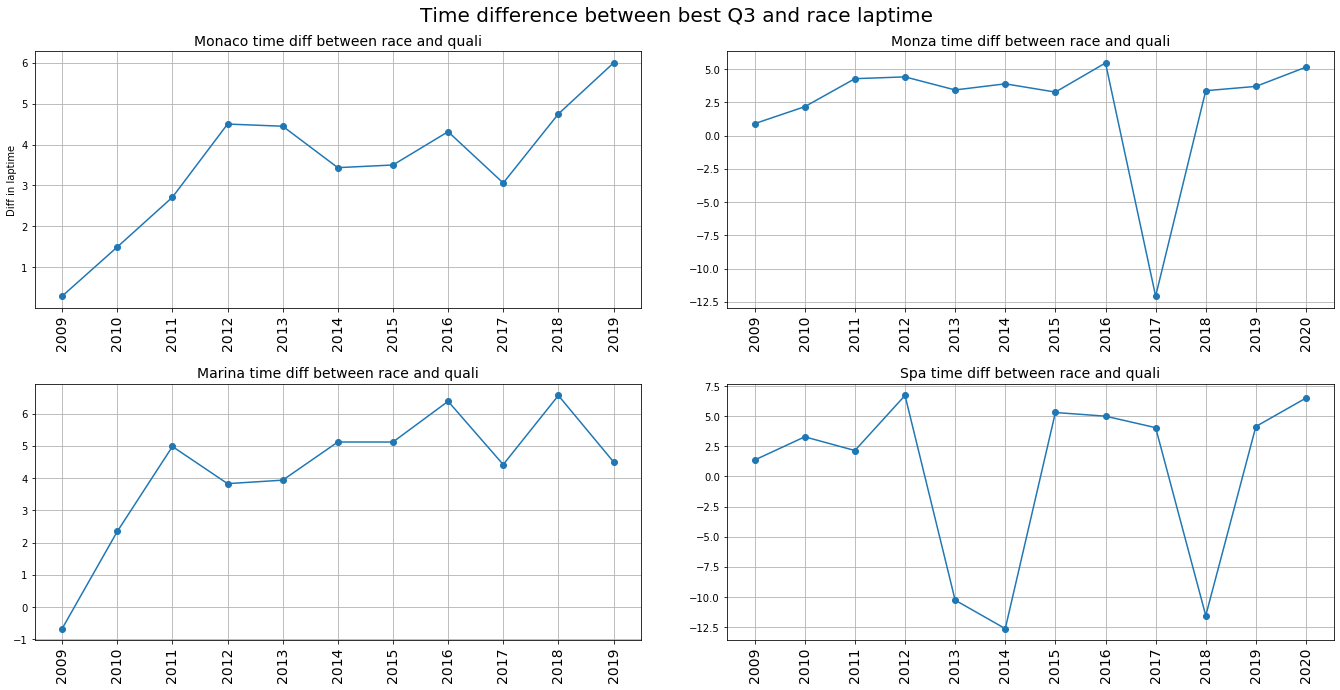

In [22]:
fig,ax =  plt.subplots(2,2, figsize=(20,10))
fig.tight_layout(pad=5.5)

ax[0][0].plot(range(len(monaco_diff)), monaco_diff, marker='o')
ax[0][0].set_xticks(range(len(monaco_times_quali)), minor=False)
ax[0][0].set_xticklabels([str(elem) for elem in list(range(2009, 2020))], rotation='vertical', fontsize=14)
ax[0][0].set_title('Monaco time diff between race and quali', fontsize=14)
ax[0][0].set_ylabel('Diff in laptime')
ax[0][0].grid()

ax[0][1].plot(range(len(monza_diff)), monza_diff, marker='o')
ax[0][1].set_xticks(range(len(monza_diff)), minor=False)
ax[0][1].set_xticklabels([str(elem) for elem in list(range(2009, 2021))], rotation='vertical', fontsize=14)
ax[0][1].set_title('Monza time diff between race and quali', fontsize=14)
ax[0][1].grid()


ax[1][0].plot(range(len(marina_diff)), marina_diff, marker='o')
ax[1][0].set_xticks(range(len(marina_diff)), minor=False)
ax[1][0].set_xticklabels([str(elem) for elem in list(range(2009, 2020))], rotation='vertical', fontsize=14)
ax[1][0].set_title('Marina time diff between race and quali', fontsize=14)
ax[1][0].grid()


ax[1][1].plot(range(len(spa_diff)), spa_diff, marker='o')
ax[1][1].set_xticks(range(len(spa_diff)), minor=False)
ax[1][1].set_xticklabels([str(elem) for elem in list(range(2009, 2021))], rotation='vertical', fontsize=14)
ax[1][1].set_title('Spa time diff between race and quali', fontsize=14)
ax[1][1].grid()

fig.suptitle('Time difference between best Q3 and race laptime', fontsize=20)
plt.show()

## 2004 French GP - crazy 4 stop strategy by MSC

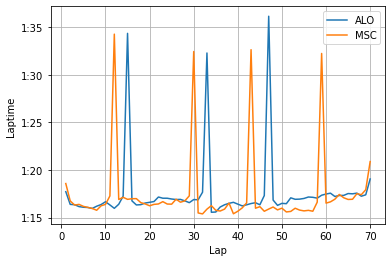

In [23]:
alo_times = lap_times[(lap_times['raceId'] == 99) & (lap_times['driverId'] == 4)]['milliseconds'].values
msc_times = lap_times[(lap_times['raceId'] == 99) & (lap_times['driverId'] == 30)]['milliseconds'].values
laps = list(range(1, 71))

plt.plot(laps, alo_times, label='ALO')
plt.plot(laps, msc_times, label='MSC')
plt.legend()
plt.yticks([75000, 80000, 85000, 90000, 95000], ['1:15', '1:20', '1:25', '1:30', '1:35'])
plt.xlabel('Lap')
plt.ylabel('Laptime ')
plt.grid()
plt.show()

In [24]:
# plt.plot(laps, alo_times, label='ALO')
# plt.plot(laps, msc_times, label='MSC')
# plt.legend()
# plt.ylim(75000, 79000)
# plt.yticks([75000, 76000, 77000, 78000, 79000], ['1:15', '1:16', '1:17', '1:18', '1:19'])
# plt.xlabel('Lap')
# plt.ylabel('Laptime ')
# plt.grid()
# plt.show()

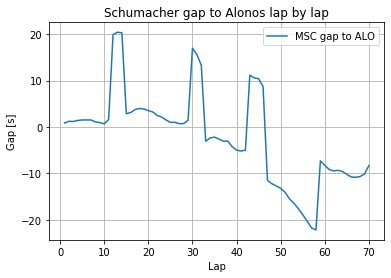

In [25]:
from numpy import cumsum

msc_alo_diff = [(msc - alo) / 1000 for msc, alo in zip(cumsum(msc_times), cumsum(alo_times))]

plt.plot(laps, msc_alo_diff, label='MSC gap to ALO')
plt.legend()
# plt.ylim(75000, 79000)
# plt.yticks([75000, 76000, 77000, 78000, 79000], ['1:15', '1:16', '1:17', '1:18', '1:19'])
plt.xlabel('Lap')
plt.ylabel('Gap [s]')
plt.grid()
plt.title('Schumacher gap to Alonos lap by lap')
plt.show()

In [26]:
alo_time = alo_times.sum()
msc_time = msc_times.sum()
f'Michale Schumacher won 2004 France GP by {(alo_time - msc_time) / 1000}s.'

'Michale Schumacher won 2004 France GP by 8.329s.'

# Wnioski

Zestawienie zespołów ukazuje dominacje Ferrari, zarówno pod względem zwycięst jak i zdobytyh punktów. Jest to spowodowane obecnością w sporcie przez wszystkie 70 sezonów.

Porównanie liczby zdobytych punktów przez najlepszych kierowców oraz liczby wygranych przez nich wyścigów pokazuje ciekawą rzecz. Schumacher i Hamilton mają prawie taką samą liczbę zwyciestw, mimo to liczba ich punktów różni się niezwykle mocno. Jest to spowodowane różnicą w systemie punktowym na przestrzeni lat. To samo tyczy się Vettela i Prosta

Ciekawym porównaniem są wykresy czasów kwalifikacji. Widoczne jest, że z roku na rok czasy okrążeń są corasz szybsze. Spowodowane jest to użyciem hybrydowych jednostek napędowych pozwalających na potężne przyspieszenie (pozwala to kręcic fantastyczne czasy na torach takich jak Monaco: https://www.youtube.com/watch?v=Ej8n56fkgWY), ale ogranicza nieco prędkość maksymalną w porównaniu do starych silników V10. Okrążenie z 2020r. na torze Monza jest najszybszym okrążeniem w historii F1, średnia prędkość wyniosła 264.362 km/h (https://www.youtube.com/watch?v=2f1PtJV0vIs)

Różnica czasów miezy kwalifikacjami a wyścigiem jest niezwykle ciekawa. Z roku na rok jest coraz większa. Czym jest to spowodowane? Od 2010 roku zakazene jest tankowanie samochodów, przez co samochocy są cięższe, a więc i wolniejsze na okrążeniu. Przed 2010r. opłacalną strategią były 2-3 pit-stopy i maksymalnie szybka jazda lekkim bolidem. Od wprowadzenia zakazu tankowania, bardziej opłaca się wykonać jeden pit-stop i jechać wolniej oszczędzając opony. Właściciele F1 co rok wprowadzają mniej trwałe mieszanki opon, aby zmusić kierówców do zwiększenia liczby pit-stopó, jednak nadal 'najszybszą' strategią jest jeden postój i powolna jazda, aby oszczędzać opony.

Ostatni akapit zawiera porównanie czasów okrążeń jednego z ciekawszych wyścigów zeszłej dekady GP Francji. Schumacher zastosował ryzykowną strategie 4 pit-stopów, pozwalającą na kręcenie okrążeń tempem kwalifikacyjnych, co pozwoliło wygrać wyscig. Na wykresach jest widoczne, że każde okrążenie jest nieco szybsze od czasu Alonso.